In [4]:
import pandas as pd
import numpy as np

# uploading data

test_data = pd.read_csv('test.csv')

 
train_data = pd.read_csv('train.csv')

In [5]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [6]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [7]:
numeric_features = train_data.select_dtypes(include=['number'])
cor = numeric_features.corr()

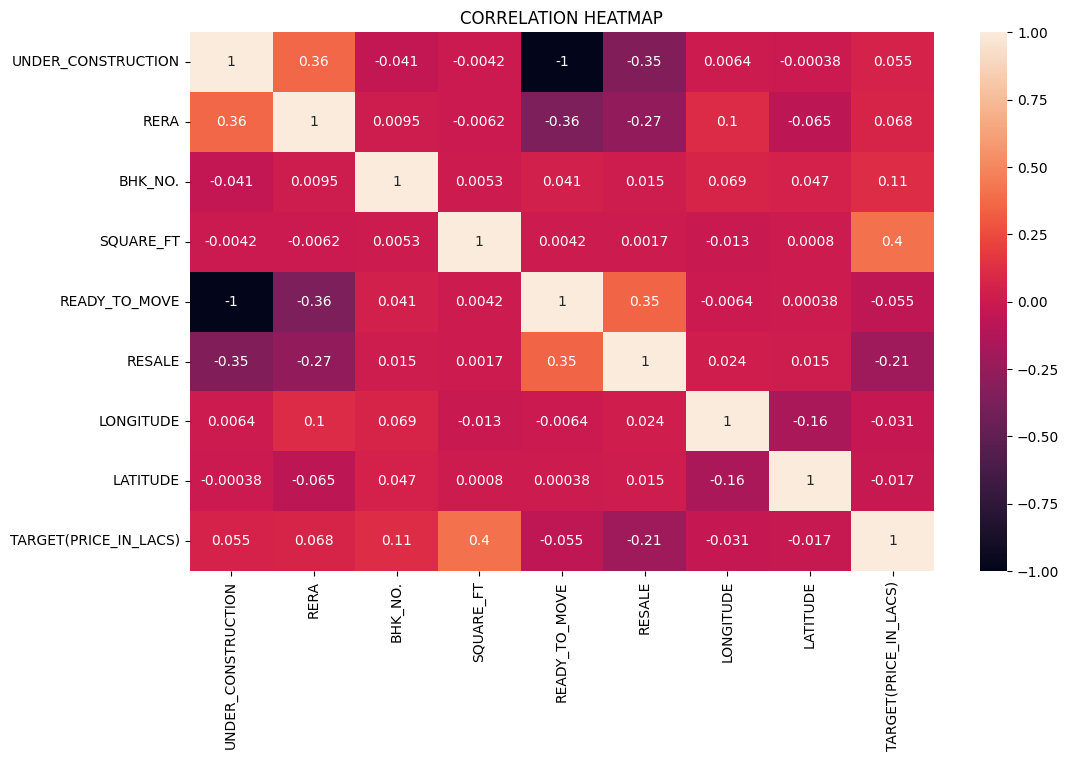

In [8]:
# plotting the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = train_data.select_dtypes(include=['number'])

#cor = numeric_data.corr()

plt.figure(figsize=(12,7))
dataplot = sns.heatmap(cor, annot=True,)
plt.title('CORRELATION HEATMAP')
plt.show()

In [9]:
# dropping the Address feature
train_data.drop(['ADDRESS'],axis=1,inplace=True)
test_data.drop(['ADDRESS'],axis=1,inplace=True)

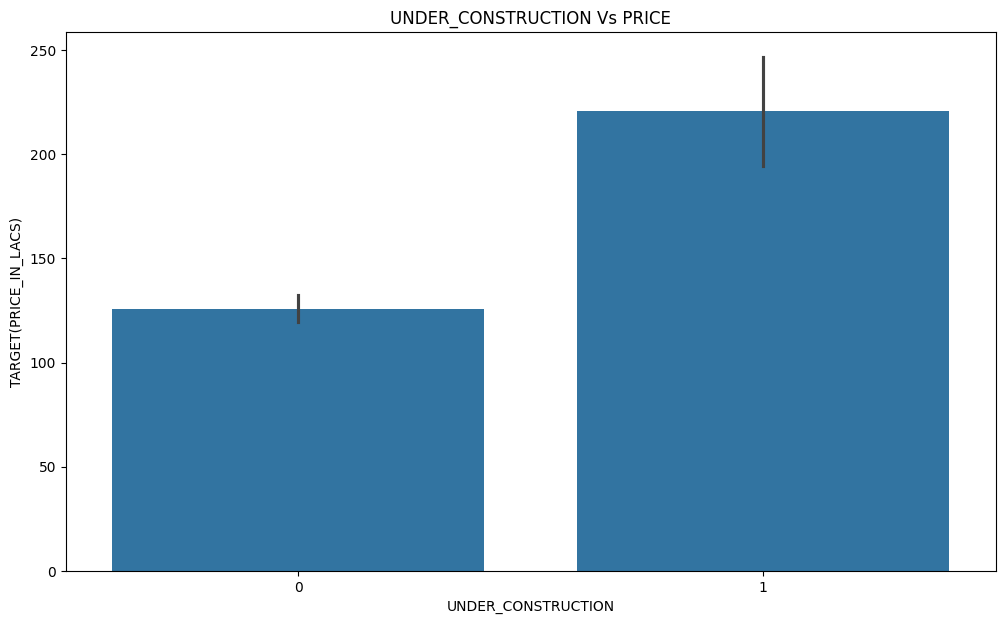

In [10]:
# plotting under_construction vs Price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['UNDER_CONSTRUCTION'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('UNDER_CONSTRUCTION Vs PRICE')
plt.show()

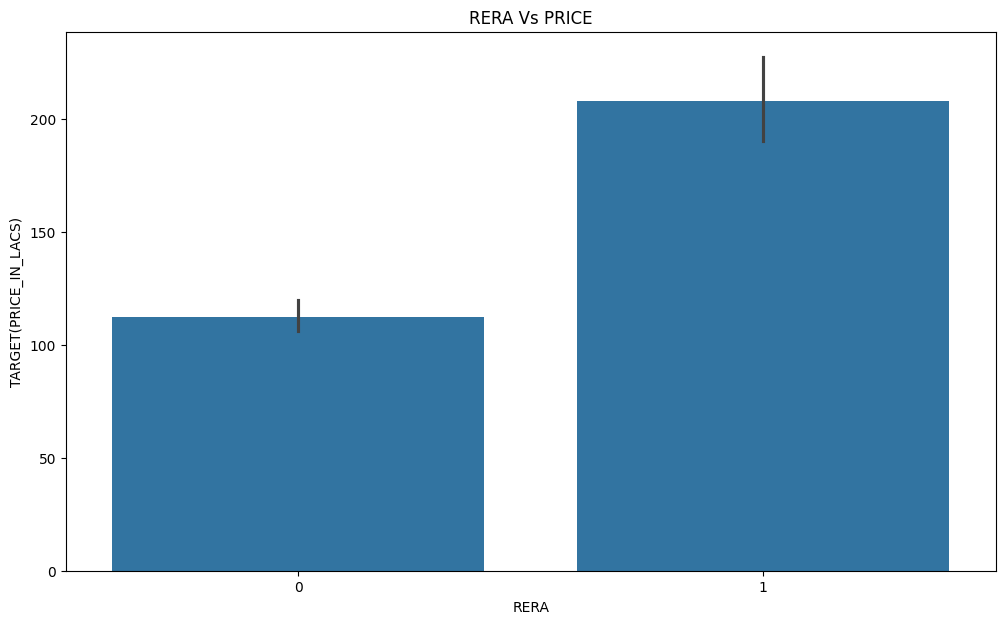

In [11]:
# plotting RERA vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['RERA'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('RERA Vs PRICE')
plt.show()

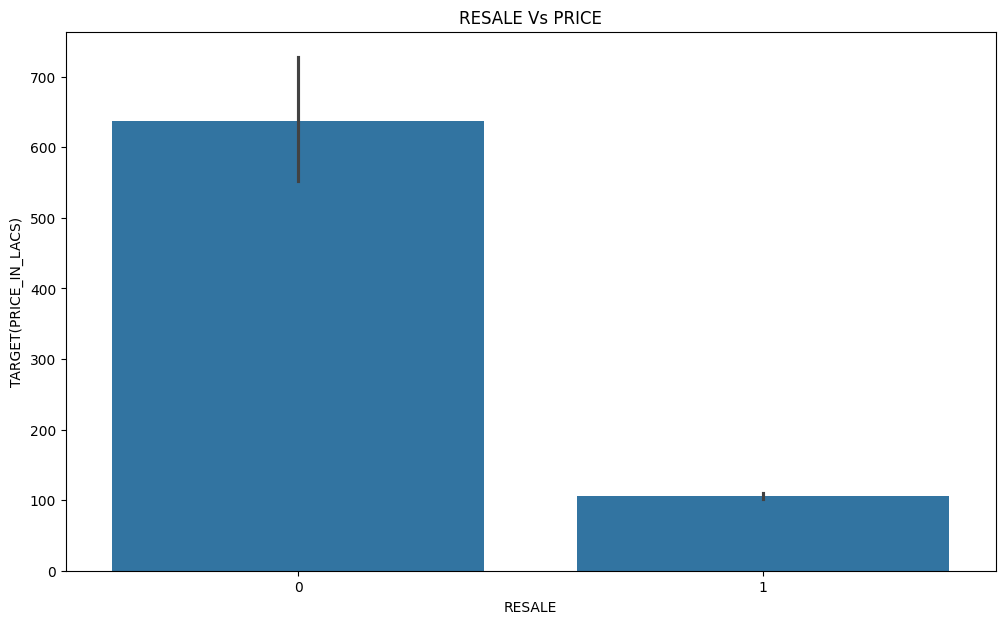

In [12]:
# plotting resale vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['RESALE'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('RESALE Vs PRICE')
plt.show()

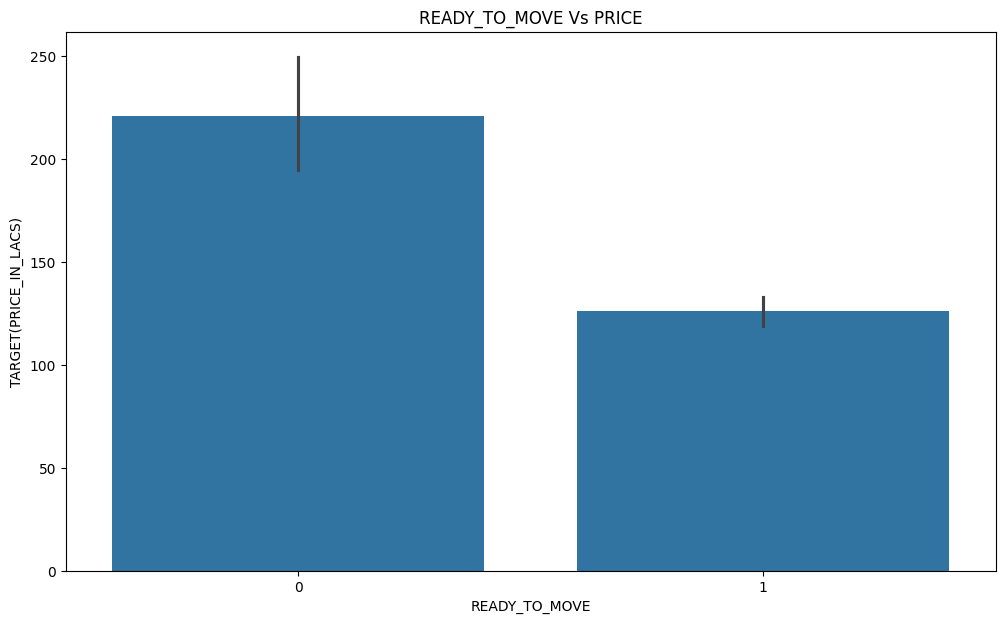

In [13]:
# plotting ready to move vs target price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['READY_TO_MOVE'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('READY_TO_MOVE Vs PRICE')
plt.show()

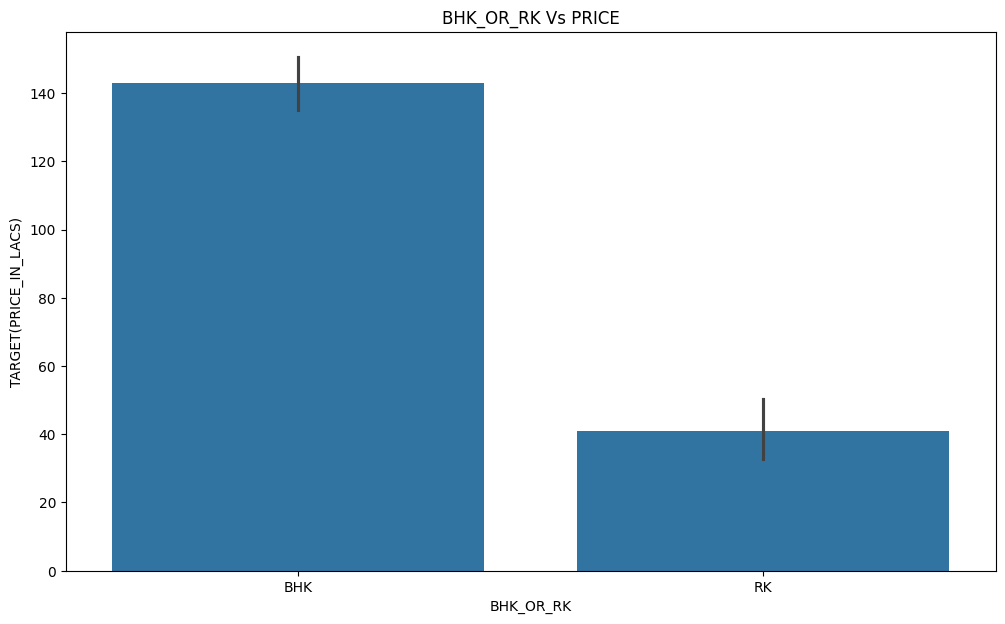

In [14]:
# plotting BHK_OR_RK vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['BHK_OR_RK'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_OR_RK Vs PRICE')
plt.show()

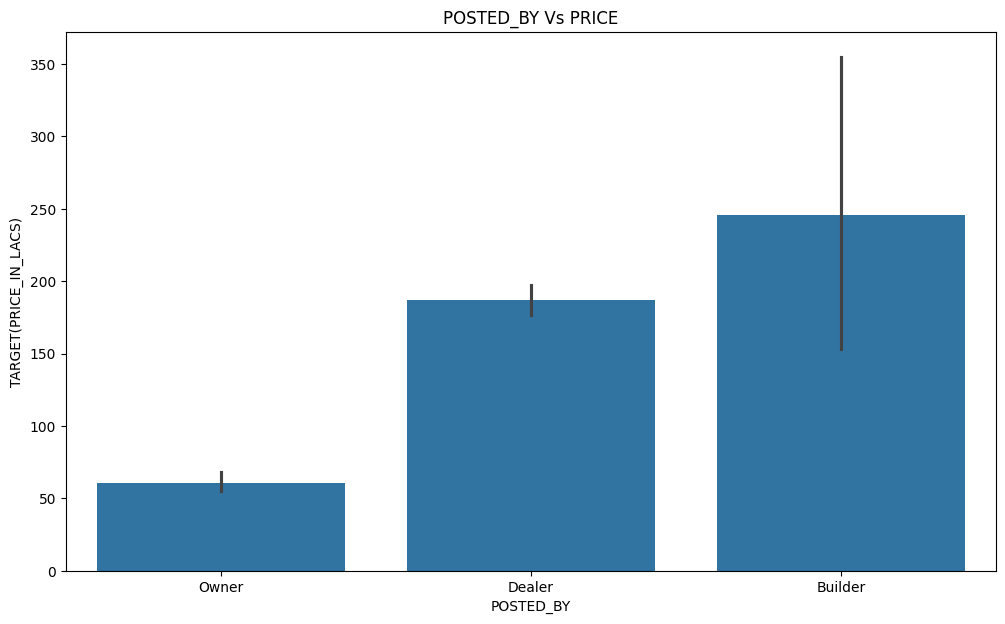

In [15]:
# plotting posted_by vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['POSTED_BY'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('POSTED_BY Vs PRICE')
plt.show()

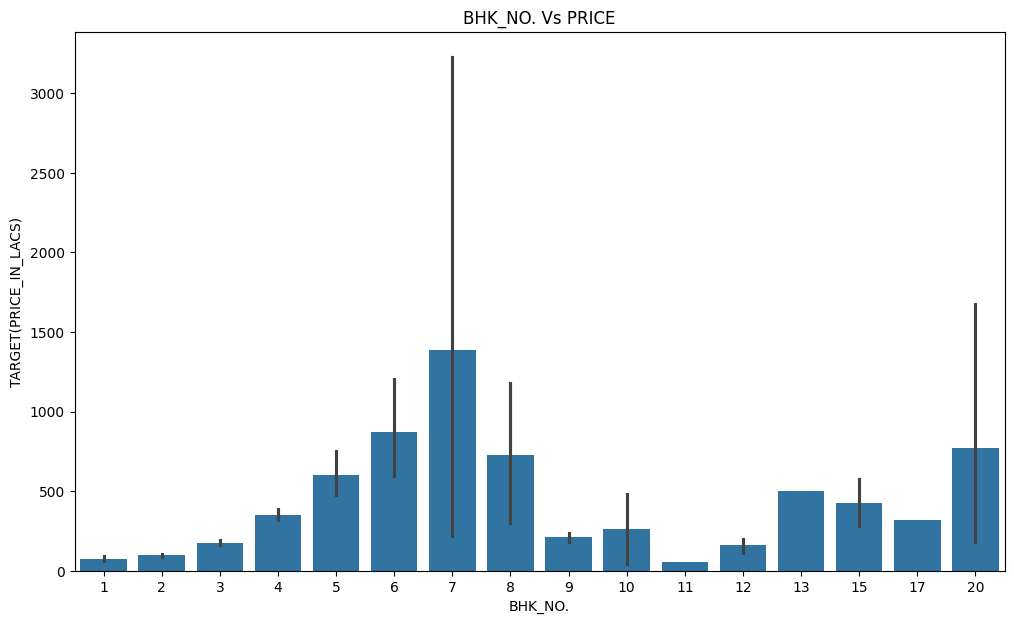

In [16]:
# plotting BHK_NO vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['BHK_NO.'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_NO. Vs PRICE')
plt.show()

<Figure size 1200x700 with 0 Axes>

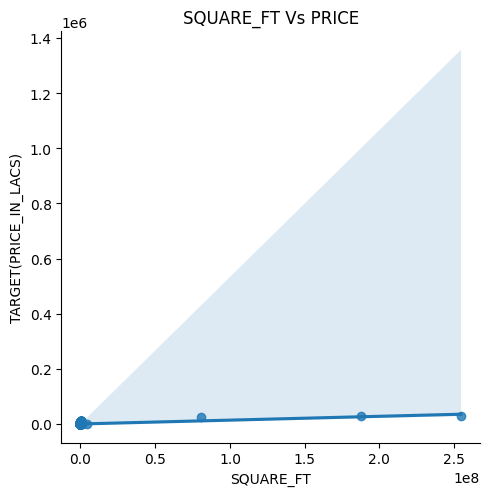

In [17]:
# plotting Square_feet vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'SQUARE_FT', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('SQUARE_FT Vs PRICE')
plt.show()

<Figure size 1200x700 with 0 Axes>

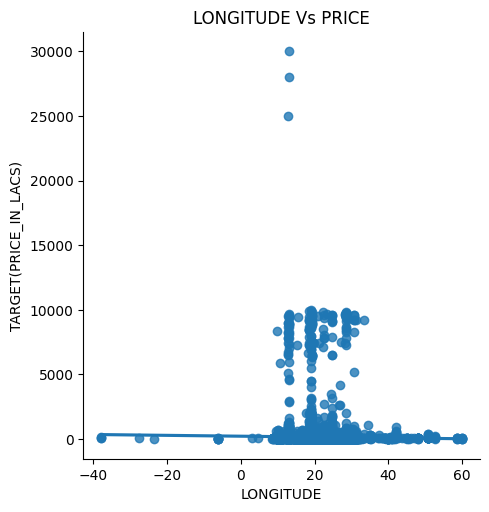

In [18]:
# plotting longitud vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LONGITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LONGITUDE Vs PRICE')
plt.show()

<Figure size 1200x700 with 0 Axes>

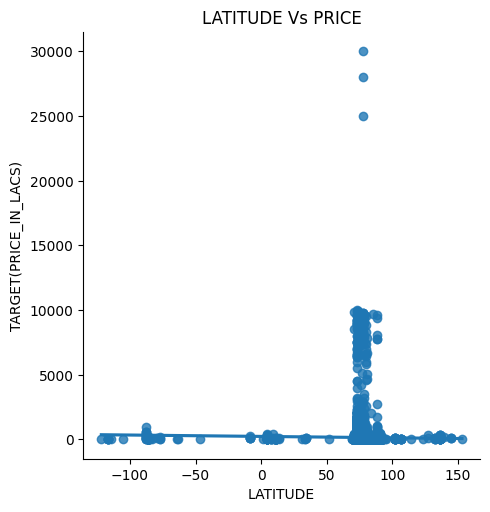

In [19]:
# plotting latitude vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LATITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LATITUDE Vs PRICE')
plt.show()

In [20]:
# changing to numerical values
train_data['BHK_OR_RK'] = train_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})
train_data['POSTED_BY'] = train_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})

test_data['BHK_OR_RK'] = test_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})
test_data['POSTED_BY'] = test_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})

In [21]:
Y = train_data['TARGET(PRICE_IN_LACS)']
X = train_data.drop(['TARGET(PRICE_IN_LACS)'], axis=1)

In [22]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,1,0,0,2,1,1300.236407,1,1,12.969910,77.597960
1,2,0,0,2,1,1275.000000,1,1,12.274538,76.644605
2,1,0,0,2,1,933.159722,1,1,12.778033,77.632191
3,1,0,1,2,1,929.921143,1,1,28.642300,77.344500
4,2,1,0,2,1,999.009247,0,1,22.592200,88.484911


In [23]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)
print('train features shape:', X_train.shape,';','train label shape:', Y_train.shape)
print('validation features shape:', X_val.shape,';','validation label shape:', Y_val.shape)

train features shape: (26505, 10) ; train label shape: (26505,)
validation features shape: (2946, 10) ; validation label shape: (2946,)


In [24]:
# importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# fitting the model
boosting = GradientBoostingRegressor(n_estimators=2000, max_depth=5, learning_rate=0.1)
print(boosting)
boosting.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", boosting.score(X_train,Y_train))
print("Score on validation data:", boosting.score(X_val,Y_val))

GradientBoostingRegressor(max_depth=5, n_estimators=2000)
Score on training data: 0.9989880415465311
Score on validation data: 0.7319380157800792


In [25]:
# fitting boosting to the whole training dataset
boosting.fit(X_train,Y_train)

#prediction on testing dataset
Y_pred = boosting.predict(test_data)

In [26]:
Y_pred = pd.DataFrame(Y_pred)

In [27]:
Y_pred.to_csv('prediction.csv')

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor # Import GradientBoostingRegressor


def predict_price(model, property_features):

    # Create a DataFrame from the property features
    input_data = pd.DataFrame([property_features])

    # Get the feature names used during training
    training_features = model.feature_names_in_

    # Ensure input_data has the same columns as the training data
    input_data = input_data.reindex(columns=training_features, fill_value=0) # Fill missing columns with 0


    # Encode categorical features
    categorical_columns = ['POSTED_BY', 'BHK_OR_RK']
    label_encoders = {}

    for col in categorical_columns:
        # Create or get the LabelEncoder for this column
        if col not in label_encoders:
            label_encoders[col] = LabelEncoder()
            # Fit the encoder on training data if available (replace with your training data)
            # label_encoders[col].fit(your_training_data[col])

        # Transform the input data using the fitted encoder
        input_data[col] = label_encoders[col].fit_transform(input_data[col])

    # Predict the price
    predicted_price = model.predict(input_data)[0]

    return predicted_price

In [29]:
import joblib

# Save the trained model
model_filename = "house_price_model.pkl"
joblib.dump(boosting, model_filename)
print(f"Model saved as {model_filename}")

Model saved as house_price_model.pkl


In [30]:
import pickle

# Assuming 'model' is your trained machine learning model
with open("house_price_model.pkl", "wb") as file:
    pickle.dump(boosting, file)

print("Model saved as house_price_model.pkl")

Model saved as house_price_model.pkl


In [31]:
with open("house_price_model.pkl", "rb") as file:
    loaded_model = joblib.load(file)

print("Model loaded successfully!")


Model loaded successfully!
